---
**Autores**: Prof. João Nogueira e Prof. Dino Magri
**Licença deste notebook**:
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

# Projeto - Parte 5 - Aprendizagem Não Supervisionada - Clusterização - Exercícios

---
#### NOTA MÁXIMA: 25 pontos

#### NOME COMPLETO: `MARCIO FERNANDES CRUZ`
---




### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

In [ ]:
!pip install yellowbrick==1.4 scikit-learn==1.0.2 # Lembre-se de reiniciar o ambiente

### Carregando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

from IPython.display import clear_output

import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()

email_logado = gcloud_tokeninfo['email']

clear_output()

In [1]:
import os
import numpy as np
import pandas as pd

pasta_raiz = '/content/drive/MyDrive/Colab Notebooks/DataSet Data Science/ifood'



In [ ]:
df_orders = pd.read_csv(f'{pasta_raiz}/df_orders.csv', parse_dates=['order_timestamp_local'])
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11 13:22:06.497000+00:00,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06 17:57:17.967000+00:00,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11 20:42:32.058000+00:00,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


# Segmentação por Tipo de Comida (12 pontos)

**<span style="color:blue">(1 ponto)</span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` e utilizando uma frequência normalizada para cada `customer_id`, em outras palavras, utilizando o percentual de gasto que ele teve em cada categoria de comida.

Salve o resultado na variável `abt_seg_tipo_comida`


In [ ]:
abt_seg_tipo_comida2 = pd.crosstab(df_orders.customer_id,df_orders.merchant_dish_type , normalize='index').reset_index()
abt_seg_tipo_comida = abt_seg_tipo_comida2.drop(columns='customer_id').copy()

In [ ]:
abt_seg_tipo_comida.shape

(30079, 57)

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue">(2 pontos)</span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


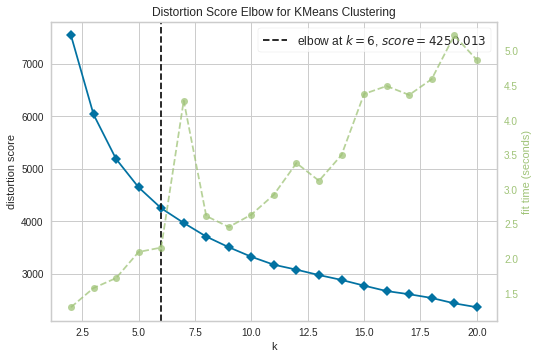

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=15)
visualizer = KElbowVisualizer(kmeans, k=(2, 21))
visualizer.fit(abt_seg_tipo_comida)
visualizer.show();

**<span style="color:blue">(1 ponto)</span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?

**<span style="color:blue">[RESPOSTA]:</span>** Foram sugeridos 6 clusters. Concordamos com a indicação mas, a partir da observação do decaimento do gráfico, é possível também sugerir a utilização de 4 ou 5 clusters. Fato que poderia ser testado.

**<span style="color:blue">(2 pontos)</span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crei uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=15)
kmeans.fit(abt_seg_tipo_comida)
abt_seg_tipo_comida['cluster_categorias'] = kmeans.labels_
abt_seg_tipo_comida.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


**<span style="color:blue">(2 pontos)</span> `Q5`** Faça a avaliação do ajuste do KMeans utilizando o Mapa de Calor.

O que podemos concluir?


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

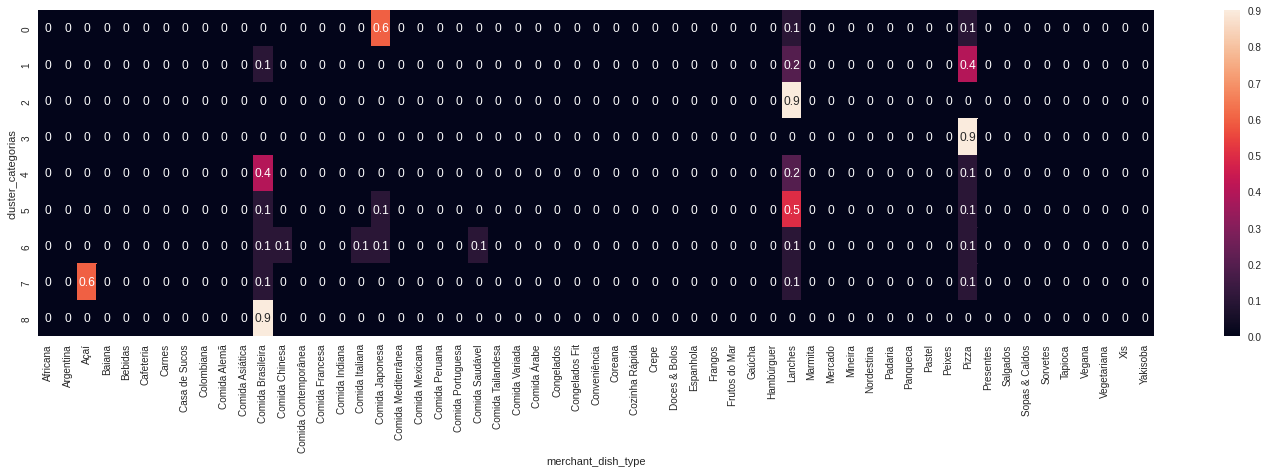

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias').mean().round(1), annot=True)

**<span style="color:blue">[RESPOSTA]:</span>** Existem alguns clusters que claramente agrupam a preferência, como o custer 2 em que 90% dos pedidos se enquadram na categoria "Lanches" e o cluster 8 que tem preferência pela categoria "Comida Brasileira". Também é possível observar clusters que reunem várias categorias, como o cluster 6, onde não é possível estabelecer claramente uma preferência.

**<span style="color:blue">(4 pontos)</span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo. (1 ponto)
* Recupere as 9 features mais importantes. (1 ponto)
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado. (1 ponto)
* Faça uma análise do resultado obtido no mapa de calor. (1 ponto)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
X = abt_seg_tipo_comida.iloc[:, 1:-1]
y = abt_seg_tipo_comida.cluster_categorias
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
features_mais_importantes = pd.Series(clf.feature_importances_, index=X.columns.to_list()).sort_values(ascending=False).head(9).index

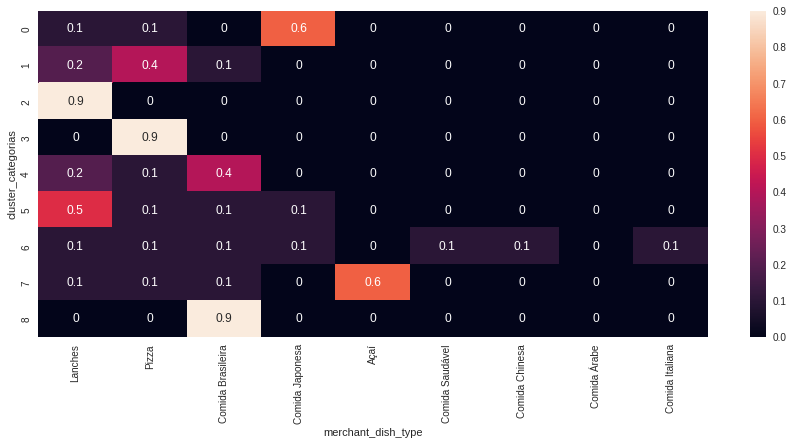

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias')[features_mais_importantes].mean().round(1), annot=True)

**<span style="color:blue">[RESPOSTA]:</span>** Utilizando a técnica Surrougate Tree foi possível destacar os agrupamentos mais importantes e ratificar as observações realizadas no exercício anterior.

# Segmentação por RFV (13 pontos)

**<span style="color:blue">(4 pontos)</span> `Q7`** Crei a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`. (1 ponto)
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`. (1 ponto)
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`. (1 ponto)
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`. (1 ponto)



In [ ]:
abt_rfv = df_orders.groupby('customer_id').agg(
        total_pedidos = ('order_id', 'count'),
        total_receita = ('order_total', 'sum')
    ).reset_index()

In [ ]:
abt_rfv

,customer_id,total_pedidos,total_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96
...,...,...,...
30074,fffc6d5755829710151aec9a2f9b7e38fc6157d6854260...,5,300.80
30075,fffca8befe314aa1b1bc4629875f0141689ec77b9e1a16...,26,978.49
30076,fffd4c0add1e365532304b76bad96c2a585bd15be92902...,9,410.87
30077,fffdc611548c91b0cbf436b5a7f9535e2ea6b221ccee50...,11,391.99


**<span style="color:blue">(1 ponto)</span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [ ]:
abt_rfv['rank_pct_pedidos'] = abt_rfv['total_pedidos'].rank(pct=True)

abt_rfv['rank_pct_receita'] = abt_rfv['total_receita'].rank(pct=True)

In [ ]:
abt_rfv

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723
...,...,...,...,...,...
30074,fffc6d5755829710151aec9a2f9b7e38fc6157d6854260...,5,300.80,0.330197,0.369859
30075,fffca8befe314aa1b1bc4629875f0141689ec77b9e1a16...,26,978.49,0.810333,0.708567
30076,fffd4c0add1e365532304b76bad96c2a585bd15be92902...,9,410.87,0.486353,0.449782
30077,fffdc611548c91b0cbf436b5a7f9535e2ea6b221ccee50...,11,391.99,0.547192,0.435553


**<span style="color:blue">(1 pontos)</span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

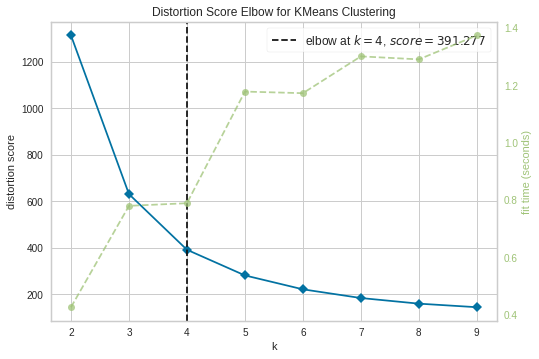

In [ ]:
X_abt_rfv = abt_rfv[['rank_pct_pedidos', 'rank_pct_receita']].copy()

kmeans = KMeans(random_state = 15)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_abt_rfv)
visualizer.show();

**<span style="color:blue">(1 ponto)</span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(X_abt_rfv)
abt_rfv['cluster_fv'] = kmeans.labels_

In [ ]:
abt_rfv

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855,1
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723,1
...,...,...,...,...,...,...
30074,fffc6d5755829710151aec9a2f9b7e38fc6157d6854260...,5,300.80,0.330197,0.369859,3
30075,fffca8befe314aa1b1bc4629875f0141689ec77b9e1a16...,26,978.49,0.810333,0.708567,2
30076,fffd4c0add1e365532304b76bad96c2a585bd15be92902...,9,410.87,0.486353,0.449782,3
30077,fffdc611548c91b0cbf436b5a7f9535e2ea6b221ccee50...,11,391.99,0.547192,0.435553,3


**<span style="color:blue">(1 ponto)</span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


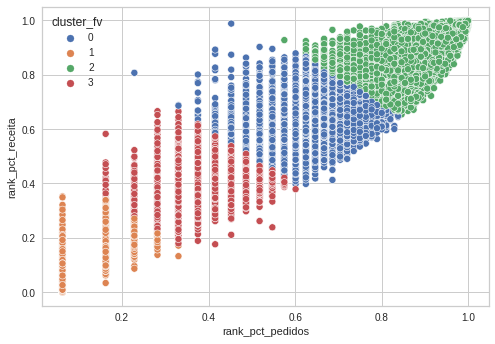

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=abt_rfv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep');

**<span style="color:blue">(2 pontos)</span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

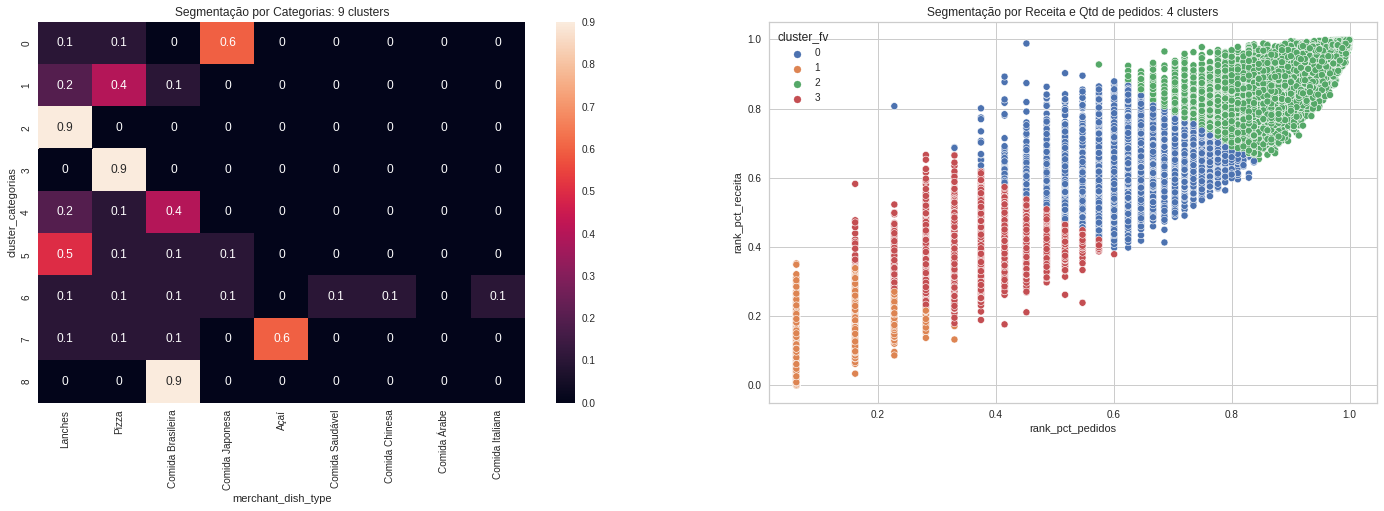

In [ ]:
fig, ax = plt.subplots(figsize=(24, 7), nrows=1, ncols=2)

ax[0].set_title('Segmentação por Categorias: 9 clusters');
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias')[features_mais_importantes].mean().round(1), annot=True, ax=ax[0]);
ax[1].set_title('Segmentação por Receita e Qtd de pedidos: 4 clusters');
sns.scatterplot(data=abt_rfv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep',ax=ax[1]);

**<span style="color:blue">(1 ponto)</span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

In [ ]:
resultado_segmentacaoA = (
    abt_seg_tipo_comida2
    .merge(abt_seg_tipo_comida, left_index=True, right_index=True))

In [ ]:
resultado_segmentacaoB = (
    abt_rfv
    .merge(X_abt_rfv, left_index=True, right_index=True))

In [ ]:
resultado_segmentacao = (
    resultado_segmentacaoA
    .merge(resultado_segmentacaoB, on='customer_id', how='left')
    .filter(['customer_id', 'cluster_categorias', 'cluster_fv'])
    .reset_index()
)
resultado_segmentacao.head()

,index,customer_id,cluster_categorias,cluster_fv
0,0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,3,3
1,1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,4,3
2,2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,5,3
3,3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,1,1
4,4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,5,1


In [ ]:
resultado_segmentacao = resultado_segmentacao.drop(columns='index').copy()

In [ ]:
resultado_segmentacao.head()

,customer_id,cluster_categorias,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,3,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,4,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,5,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,1,1
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,5,1


**<span style="color:blue">(1 ponto)</span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

In [ ]:
from numpy.ma.core import default_fill_value
resultado_analise =  (
    resultado_segmentacao
    .groupby(by=["cluster_categorias", "cluster_fv"])
    .count()
    .unstack(level=0)
)

resultado_analise["total"] = resultado_analise.sum(axis=1)

resultado_analise


customer_id                                                \
cluster_categorias           0     1     2     3     4     5     6    7    8   
cluster_fv                                                                     
0                          388  1517   575   338  1295  2011   996  145  246   
1                          556   561  1931  1247   589   614   984  360  653   
2                          326  1203   292   123  1824  1981  1498  109  228   
3                          445  1274   967   579  1062  1840   821  186  315   

                   total  
cluster_categorias        
cluster_fv                
0                   7511  
1                   7495  
2                   7584  
3                   7489

**<span style="color:blue">(1 ponto)</span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.

**<span style="color:blue">[RESPOSTA]:</span>**


In [ ]:
soma_total = resultado_analise["total"].sum()

for i in range(0,9):
  nome = '{}_'.format(i)
  resultado_analise[nome] =  resultado_analise["customer_id"][i] / soma_total


resultado_analise.head(10)

customer_id                                                \
cluster_categorias           0     1     2     3     4     5     6    7    8   
cluster_fv                                                                     
0                          388  1517   575   338  1295  2011   996  145  246   
1                          556   561  1931  1247   589   614   984  360  653   
2                          326  1203   292   123  1824  1981  1498  109  228   
3                          445  1274   967   579  1062  1840   821  186  315   

                   total        0_        1_        2_        3_        4_  \
cluster_categorias                                                           
cluster_fv                                                                   
0                   7511  0.012899  0.050434  0.019116  0.011237  0.043053   
1                   7495  0.018485  0.018651  0.064198  0.041457  0.019582   
2                   7584  0.010838  0.039995  0.009708  0.004089  0.060640   
3                   7489  0.014794  0.042355  0.032149  0.019249  0.035307   

                          5_        6_        7_        8_  
cluster_categorias                                          
cluster_fv                                                  
0                   0.066857  0.033113  0.004821  0.008178  
1                   0.020413  0.032714  0.011968  0.021709  
2                   0.065860  0.049802  0.003624  0.007580  
3                   0.061172  0.027295  0.006184  0.010472

Verificamos que existe uma maior distribuição no cluster de categorias 5, representando 21% total sendo pratos do tipo "lanche". Com base na distribuição do Cluster_FV, identificamos que o cluster com maior receita é o cluster 2, que possui como o principal tipo de prato o lanche. Mesmo sendo um valor agregado não expressivo, a quantidade de vendas acaba sendo mais alta que as demais categorias de clientes.